# Measuring stress likelihood by syllable in sonnets

## Aggregating sonnet parses from Shakespeare, GenAI, and Chadwyck-Healey

##### `get_sonnet_rhythm_data`: Get combined rhythm analysis data for sonnets from multiple sources.

* Loading sonnet rhythm data from `{REPO}/data/data_as_in_paper/sonnet_rhythm_data_by_sonnet_period.csv.gz`

,stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,is_iambic_pentameter,is_unambigously_iambic_pentameter,syll01_stress,syll02_stress,syll03_stress,syll04_stress,syll05_stress,forth_syllable_stressed,num_pos_ww,num_pos,num_sylls,perc_ww_in_meter,syll06_stress,syll07_stress,syll08_stress,syll09_stress,syll10_stress,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt,group,source
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
english/smithcha/Z300489005,1,1,"Mute is thy wild harp, now, O Bard sublime!",1,1,MUTE is.thy WILD harp NOW o BARD su BLIME,0,0,1,0,0,1,1.0,1,1,9,10,0.111111,1.0,0.0,1.0,0.0,1.0,2155.0,1750-1799 Later Eighteenth-Century,English Poetry,"Smith, Charlotte Turner, 1749-1806",1749.0,SONNET LXXXII. TO THE SHADE OF BURNS.,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,2,"Who, amid Scotia's mountain solitude,",4,1,WHO a MID.SCO tia's MOUN tain SO li TUDE,0,0,1,0,1,1,0.0,1,0,9,10,0.000000,1.0,0.0,1.0,0.0,1.0,2155.0,1750-1799 Later Eighteenth-Century,English Poetry,"Smith, Charlotte Turner, 1749-1806",1749.0,SONNET LXXXII. TO THE SHADE OF BURNS.,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94740e74,3,12,"For thee, my love, my heart doth beat in vain.",25,1,for THEE my LOVE my HEART doth BEAT in VAIN,1,0,0,0,0,1,0.0,1,0,10,10,0.000000,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
94740e74,4,13,"And thus, I'll cherish this, my love for thee,",28,1,and THUS i'll CHE rish THIS my LOVE for.thee,0,0,0,1,0,1,0.0,1,1,9,10,0.111111,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai


## Plotting stress likelihood by syllable in sonnets

##### `plot_stress_by_syll`: Create a plot showing stress likelihood across syllable positions by group.

* Loading stress by syllable plot from `{REPO}/data/data_as_in_paper/figures/stress_by_syll_sonnet_period.png`

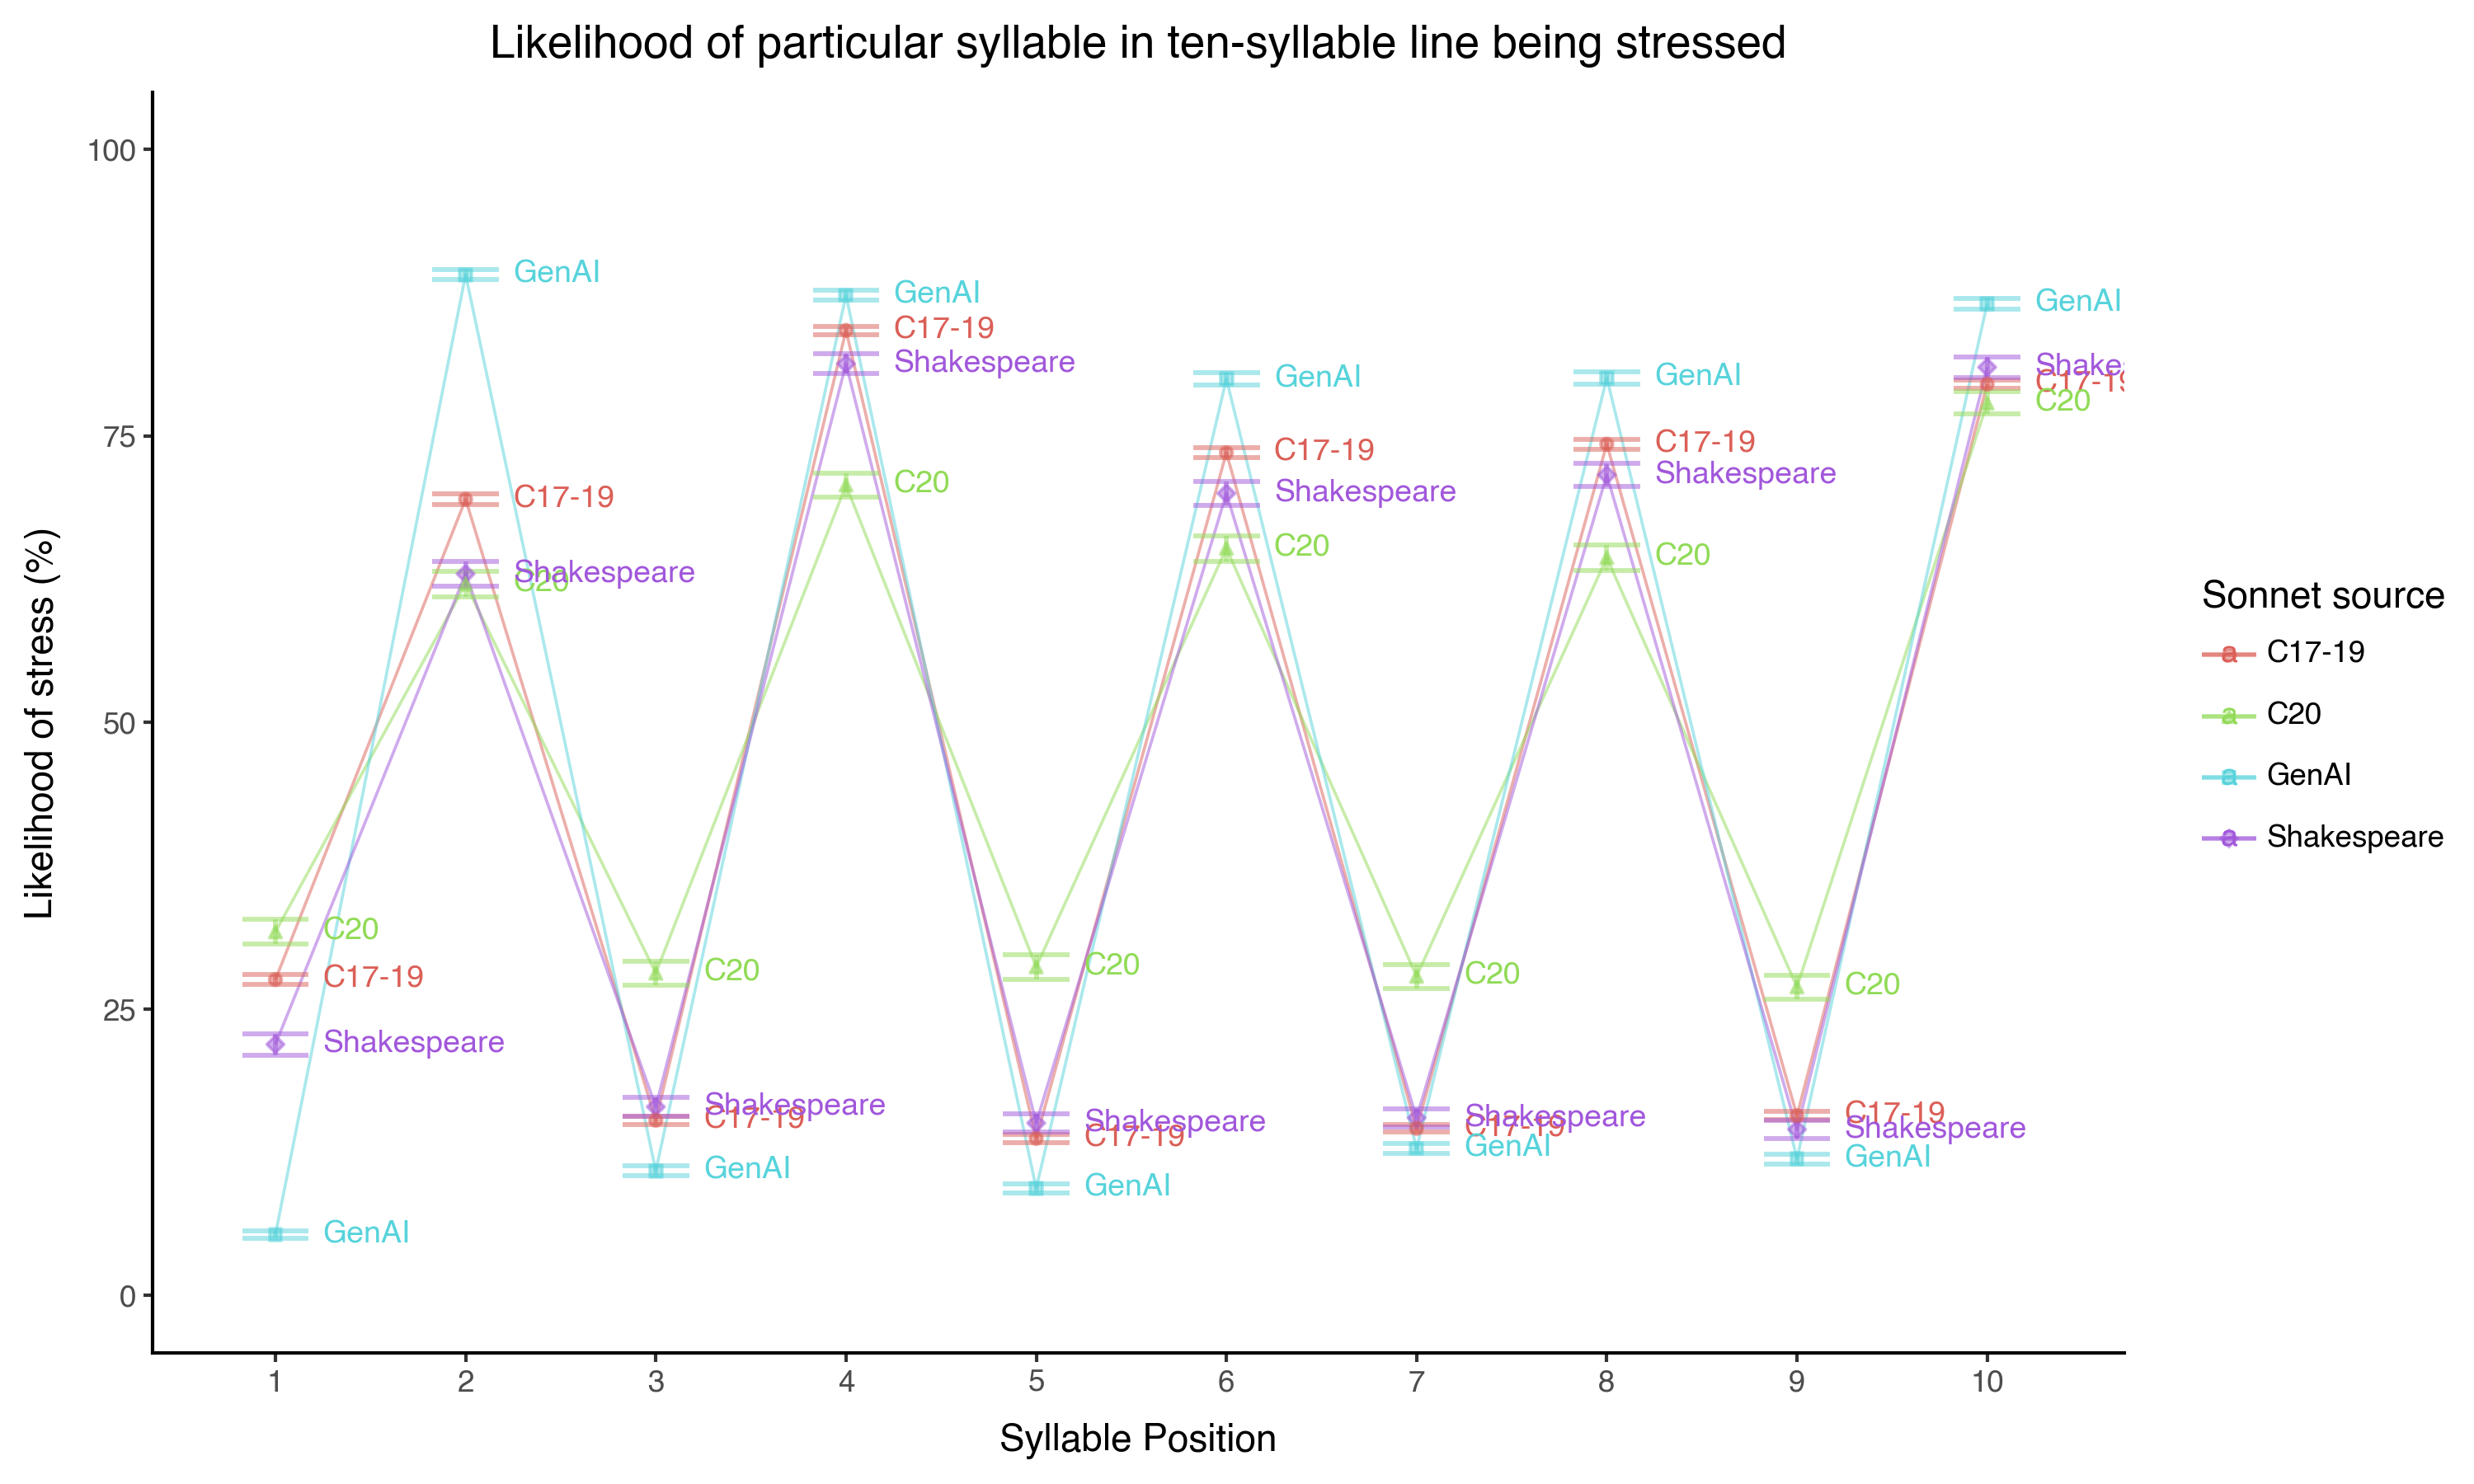

## Plotting perfect pentameter in sonnets

##### `plot_perfect_pentameter`: Create a horizontal bar plot showing iambic pentameter adherence by group.

* Loading sonnet rhythm data from `{REPO}/data/data_as_in_paper/sonnet_rhythm_data_by_sonnet_period.csv.gz`

* Saving perfect pentameter plot to `{REPO}/data/data_as_in_paper/figures/fig.is_unambigously_iambic_pentameter.sonnet_period.png`

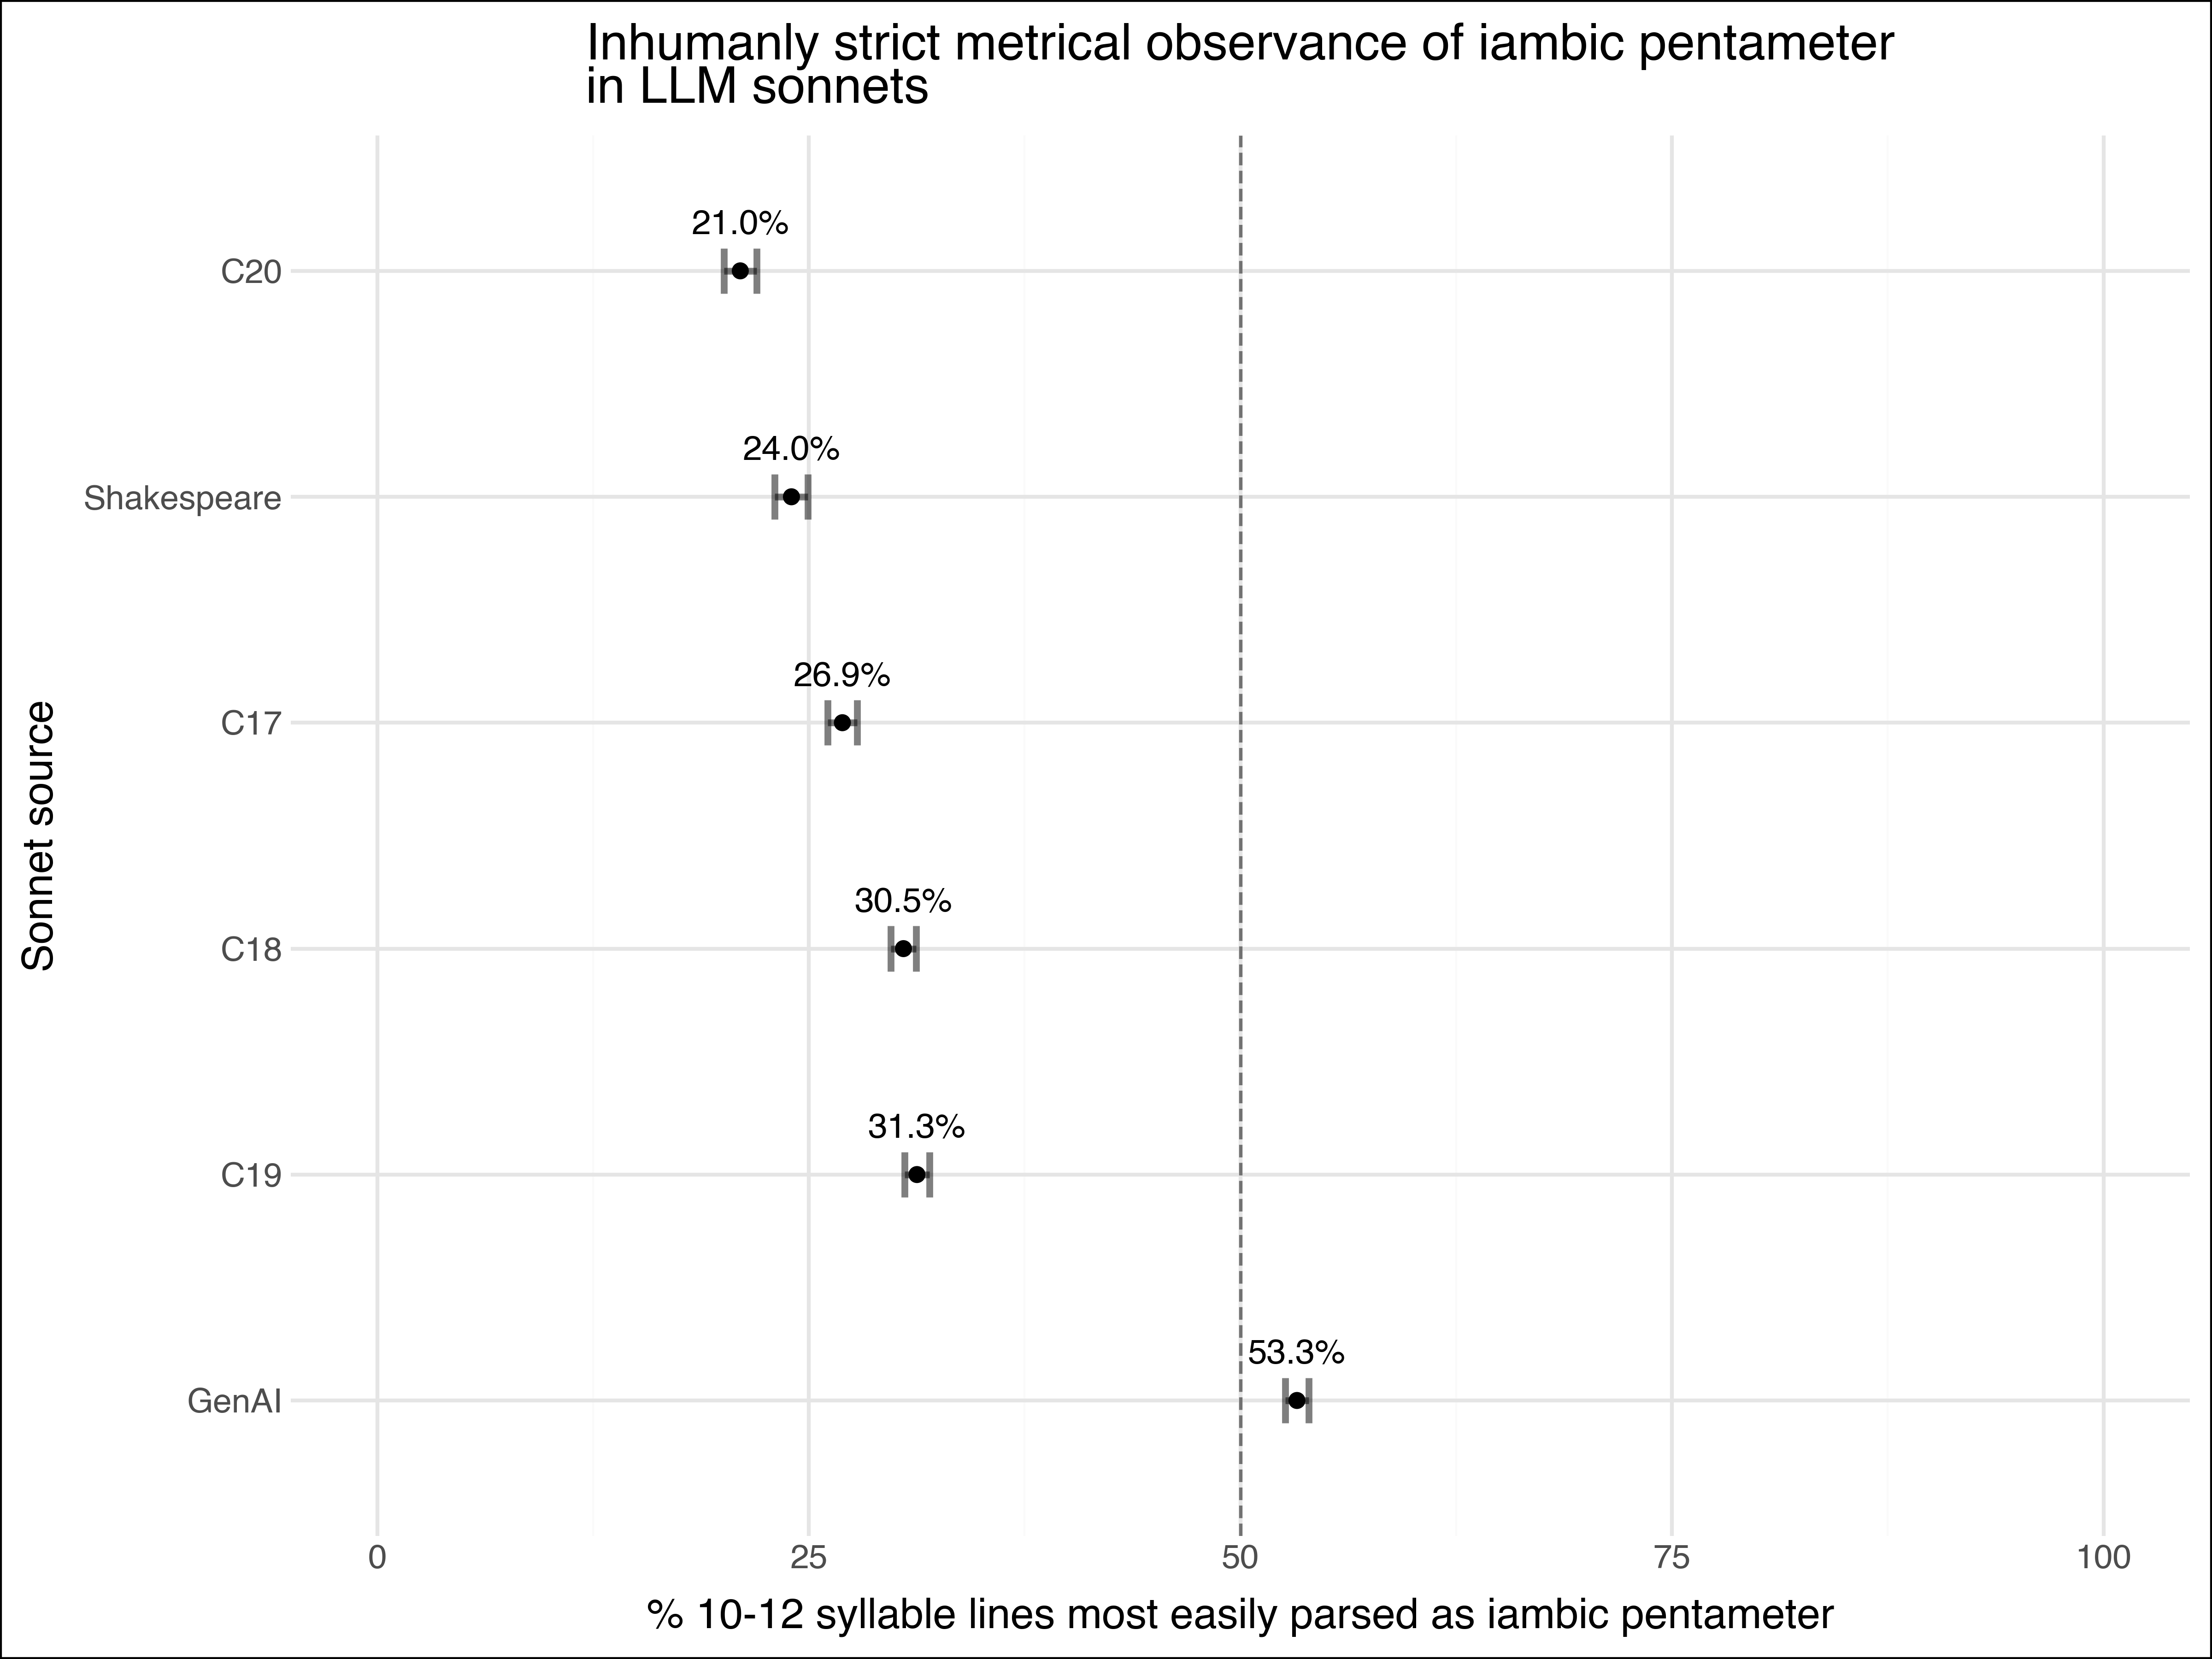

## Metrical space of actual vs. generative Shakespearean sonnets

##### `plot_metrical_space`: Create a plot showing metrical space of actual vs. generative Shakespearean sonnets.

* Saving metrical space plot to `{REPO}/data/data_as_in_paper/figures/fig.metrical_space.sonnet_period.png`

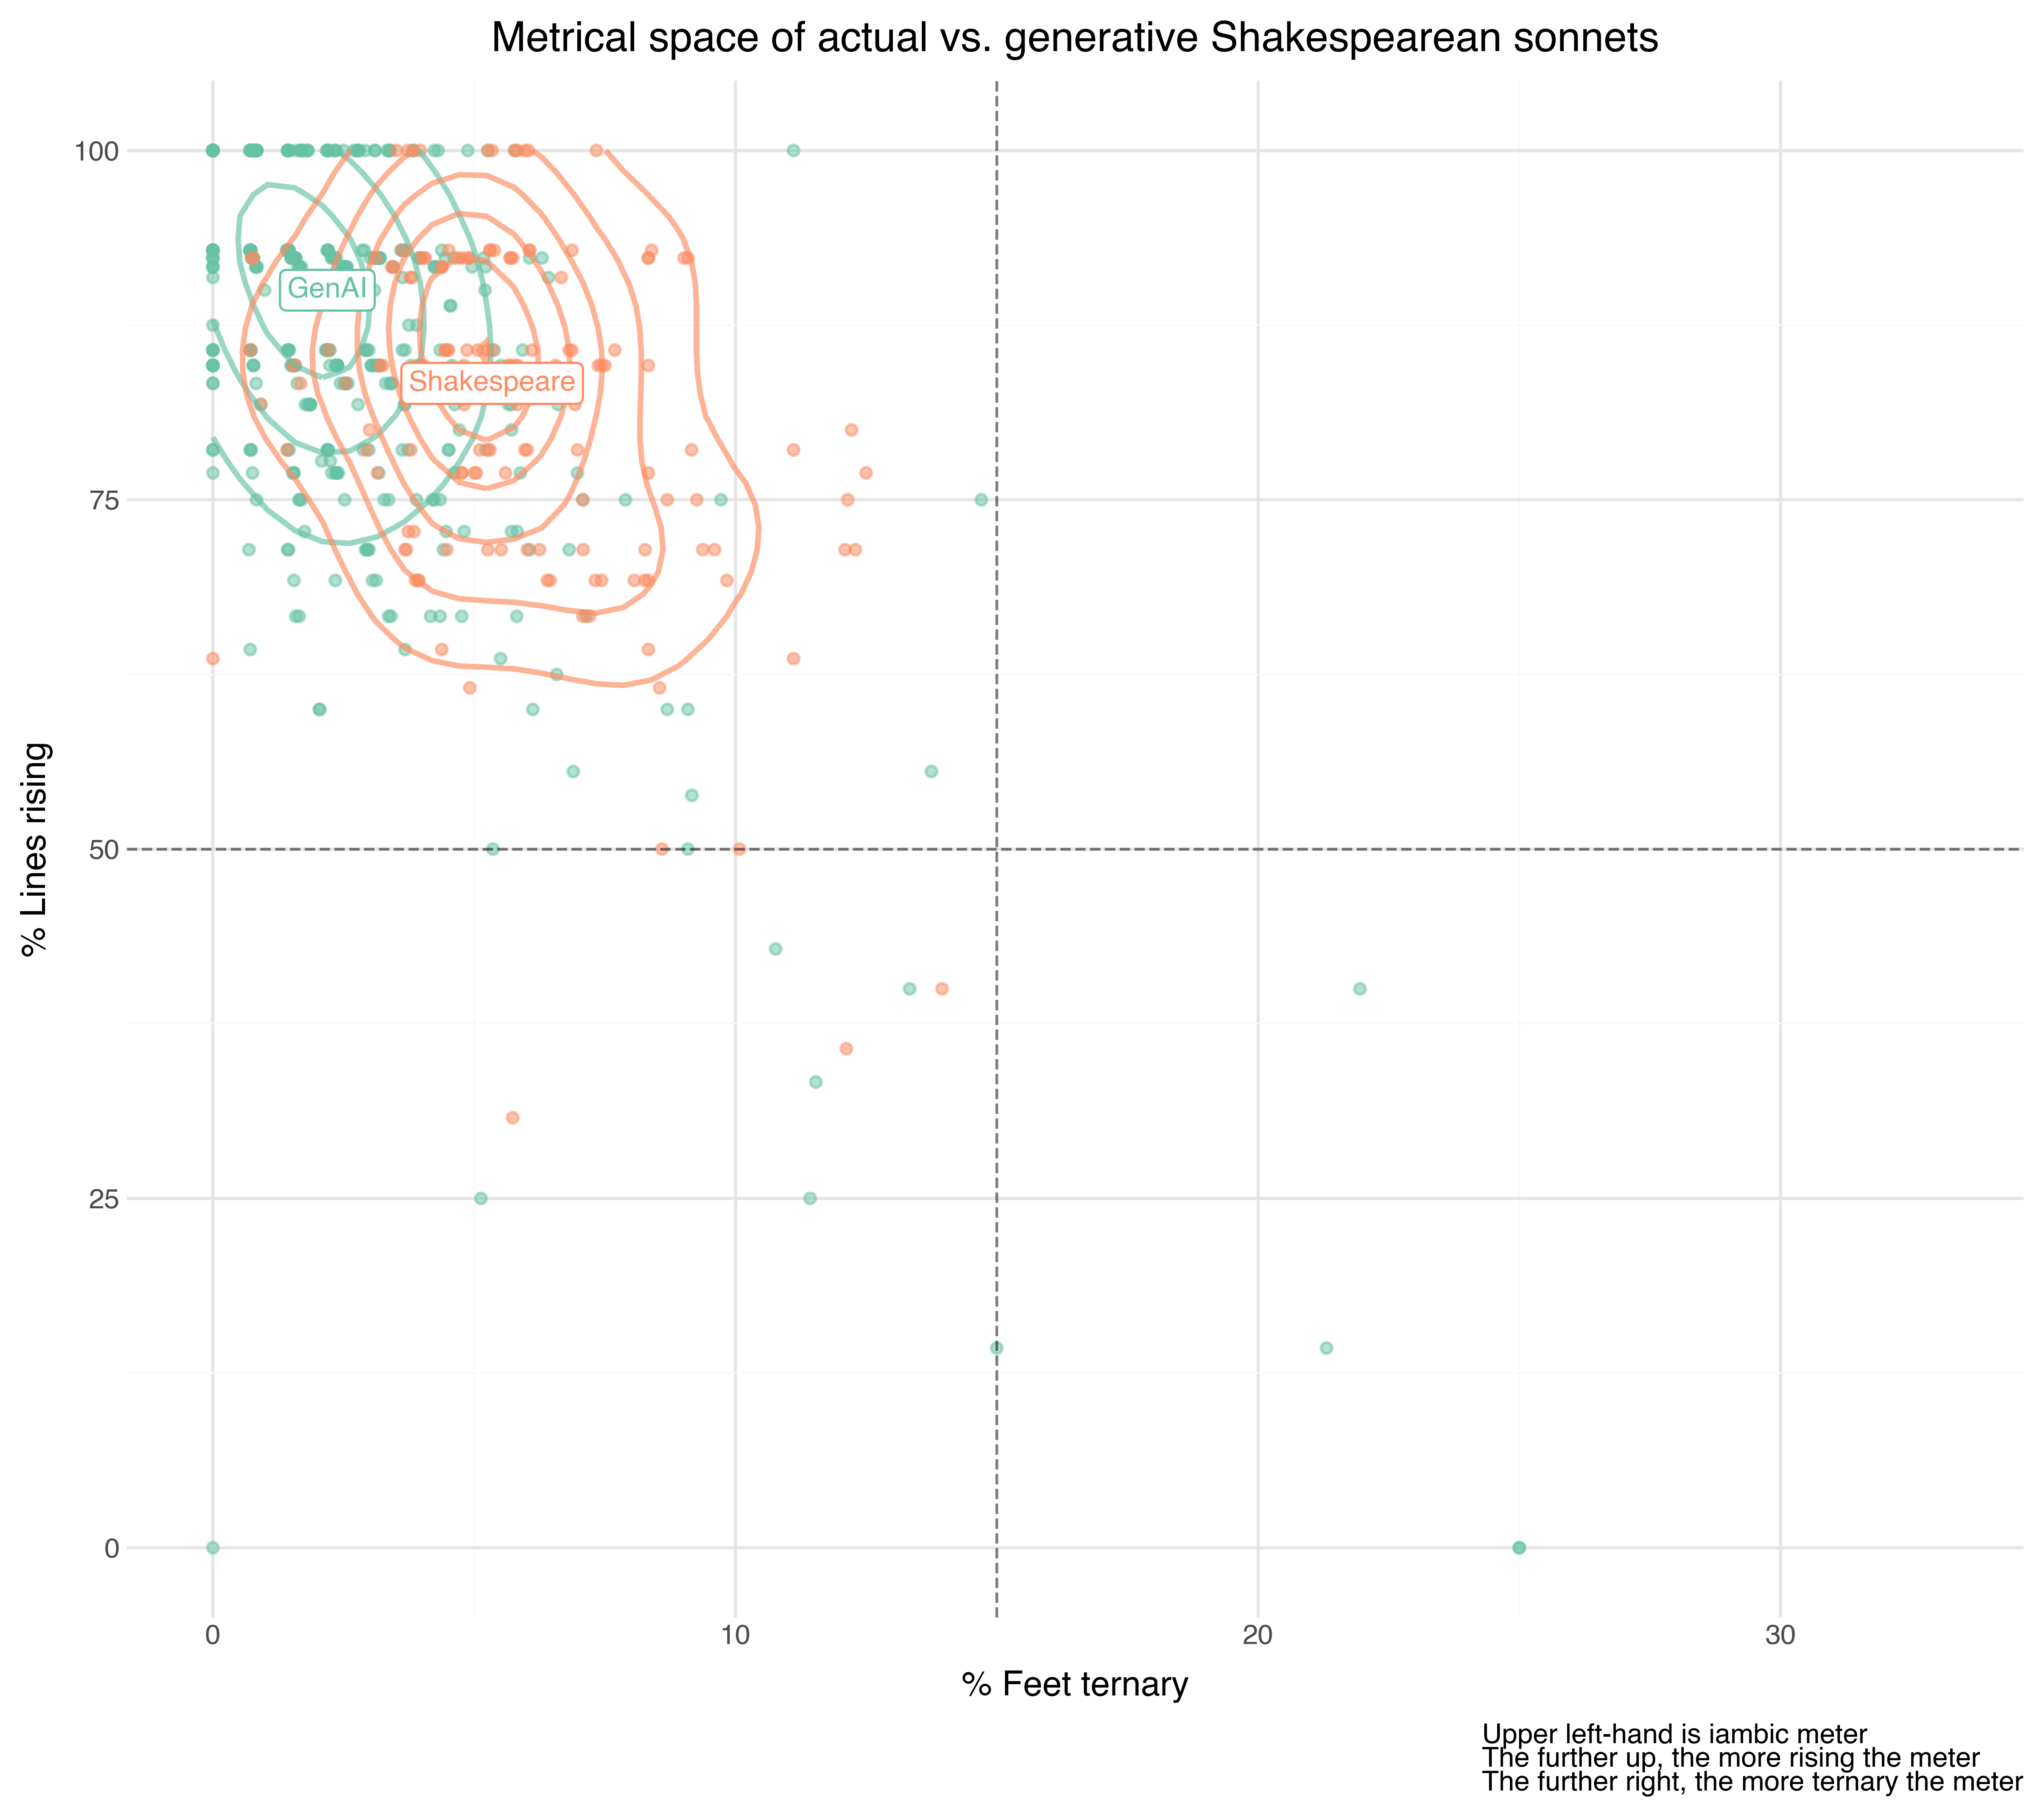

In [1]:
# Code
import sys
sys.path.append('../')
from generative_formalism import *

printm('# Measuring stress likelihood by syllable in sonnets')

printm('## Aggregating sonnet parses from Shakespeare, GenAI, and Chadwyck-Healey')

# Docs
documentation(get_sonnet_rhythm_data)

# Run
df_rhythm = get_sonnet_rhythm_data(
    sample_by='sonnet_period',
    as_in_paper=True,
    as_replicated=False,
    force=False,
    verbose=True,
)

# Display
display(df_rhythm)

printm('## Plotting stress likelihood by syllable in sonnets')

documentation(plot_stress_by_syll)
try_display(plot_stress_by_syll(df_rhythm))

# printm('### Statistical tests')

# df_rhythm_syll = get_rhythm_data_by_syll(df_rhythm)
# df_stats = compute_all_stat_signif(
#     df_rhythm_syll,
#     'syll_num',
#     'group',
#     'stress'
# )
# display(df_stats)


printm('## Plotting perfect pentameter in sonnets')
documentation(plot_perfect_pentameter)
df_rhythm2 = get_sonnet_rhythm_data('sonnet_period',collapse_C17_19=False)
try_display(plot_perfect_pentameter(df_rhythm2, force=True))

# df_stats = compute_stat_signif(
#     df_rhythm2,
#     'group',
#     'is_unambigously_iambic_pentameter'
# )
# display(df_stats)

printm('## Metrical space of actual vs. generative Shakespearean sonnets')

documentation(plot_metrical_space)
plot_metrical_space(df_rhythm)
